# 명목형, 순서형, 연속형 구분

## (1) 데이터셋 로드

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
train=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\캐글 모델링\boston house\data\train.csv", index_col='Id')
test=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\캐글 모델링\boston house\data\test.csv", index_col='Id')

# 프로파일 및 eda 목적용 데이터 프레임
data=pd.concat([train, test], sort=False)

# data description에 안나와있는 특성 삭제
data.drop(columns=['KitchenAbvGr'], inplace=True)
data.drop(columns=['BedroomAbvGr'], inplace=True)

## (2) 간단하게 평균값 or 최빈값으로 결측치 제거

In [41]:
# 결측값있는 특성
missing_col=list(data.columns[data.isnull().any()])
# 결측값 개수
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)

# 결측값이 '없음'인 특성들의 결측치는 'nan'으로 채움
non_col=['Alley', 'FireplaceQu','Fence', 'MiscFeature','PoolQC']
for i in non_col:
    data[i]=data[i].fillna('nan')

# 결측치를 'nan'으로 채웠으므로 missing_col 리스트에서 제거
for i in non_col:
     missing_col.remove(i)

# 최빈값으로 채울 특성들
mode_list = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType',
             'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'SaleType']

# 평균값으로 채울 특성들
mean_list = ['LotFrontage', 'TotalBsmtSF', 'GarageArea']

# 결측치 대치
k=0
for i in mode_list:
        data[i] = data[i].fillna(data[i].mode().iloc[0])
for j in mean_list:
     data[j] = data[j].fillna(data[j].mean())

In [42]:
# 결측치 처리 결과
missing_col=list(data.columns[data.isnull().any()])
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)
print(missing_col)
print(int(missing_sorted))

['SalePrice']
1459


###### 캐글 제출용 'SalePrice'에만 결측치가 남았으므로 결측치 처리 완료

# (3) 년도(year)관련 특성들을 순서형으로 가정하고 값을 매핑함

이유: 원핫인코딩을 할 경우 오버피팅될 가능성이 높다고 생각하여

10년단위로 묶었고

그 사이의 순서유무를 확인했을 때 선형성이 있다고 판단함

In [43]:
from sklearn.preprocessing import LabelEncoder
year_feature=['YearRemodAdd','GarageYrBlt','YearBuilt']

# 10년 단위로 묶음
for i in year_feature:
    data[i]=(data[i]//10)*10
    
# 10년 단위로 묶은 후 라벨인코딩
label_encoder = LabelEncoder()
for i in year_feature:
    data[i] = label_encoder.fit_transform(data[i])

c:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


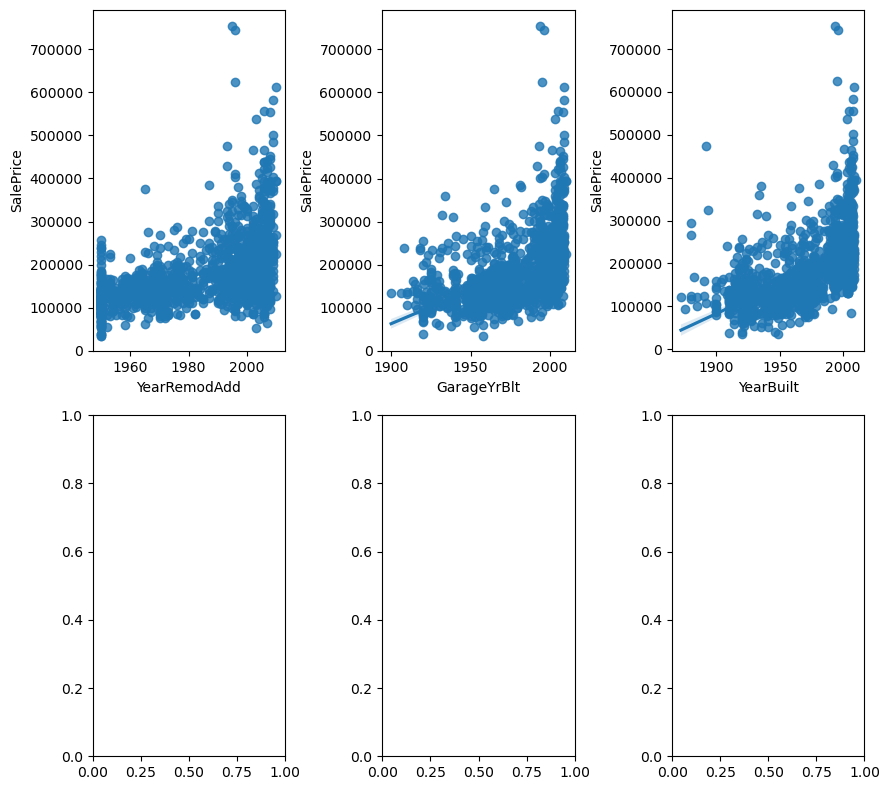

In [44]:
target = train['SalePrice']
num=len(year_feature)
col = 3
row = num//col+1

# 충분한 서브플롯 생성
fig, axs = plt.subplots(row, col, figsize=(col*3, row*4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < len(year_feature):
            sns.regplot(train[year_feature[i]], target, ax=axs[r, c])

plt.tight_layout()
plt.show()


# (4) 데이터 타입에 따른 명목형, 숫자형 구분

In [45]:
object_list=[]
numeric_list=[]
for i in list(data.columns):
    if(data[i].dtype==object):
        object_list.append(i)
    else:
        numeric_list.append(i)
print("카테고리형")
print(object_list)
print("숫자형")
print(numeric_list)

카테고리형
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
숫자형
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',

In [46]:
# MSSubClass는 등급을 나타내는 특성이므로 object_list에 추가, numeric_list에서 제거
object_list.append('MSSubClass')
numeric_list.remove('MSSubClass')

csv파일에 특성이름과 고유값을 저장해서 정리

In [47]:
# import csv

# # 특성별 고유값을 CSV 파일에 저장
# with open("카테고리 특성 고유값 정리.csv", 'w', newline='') as csvfile:
#     csvwriter = csv.writer(csvfile)
#     csvwriter.writerow(['특성', '고유값'])  #첫 행
#     for i in object_list:
#         unique_values = data[i].unique()
#         csvwriter.writerow([i, ', '.join(map(str, unique_values))])

###### 엑셀에서 고유값 정리해서 순서형으로 생각되는 변수들과 명목형 변수들을 구분함

## (5) 원핫인코딩할 변수들과 순서가 있을 것으로 예상되는 변수들 구분

### 1. 카테고리형 특성

In [48]:
#전체 카테고리 특성
total_category = [
    'GarageType', 'MasVnrType', 'Alley', 'MiscFeature', 'Electrical',
    'GarageFinish', 'BldgType', 'HouseStyle', 'Utilities', 'Neighborhood',
    'RoofMatl', 'RoofStyle', 'Heating', 'LotConfig', 'SaleCondition',
    'Street', 'Foundation', 'LotShape', 'Exterior1st', 'Exterior2nd',
    'SaleType', 'CentralAir', 'PavedDrive', 'MSSubClass', 'BsmtQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtCond', 'HeatingQC',
    'ExterQual', 'KitchenQual', 'BsmtFinType2', 'BsmtFinType1', 'LandSlope',
    'PoolQC', 'Fence', 'BsmtExposure', 'Functional', 'Condition2', 'Condition1',
    'MSZoning', 'LandContour', 'ExterCond'
]

#카테고리 변수중 원핫인코딩할 변수들
category_encode = [
    'GarageType', 'MasVnrType', 'Alley', 'MiscFeature', 'Electrical', 
    'GarageFinish', 'BldgType', 'HouseStyle', 'Utilities', 'Neighborhood', 
    'RoofMatl', 'RoofStyle', 'Heating', 'LotConfig', 'SaleCondition', 
    'Street', 'Foundation', 'LotShape', 'Exterior1st', 'Exterior2nd', 
    'SaleType', 'CentralAir', 'PavedDrive', 'MSSubClass'
]

#카테고리 변수중 순서가 있어보이는 변수 (값 변환 고려)
category_order = [
    'BsmtQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtCond', 
    'HeatingQC', 'ExterQual', 'KitchenQual', 'BsmtFinType2', 'BsmtFinType1', 
    'LandSlope', 'PoolQC', 'Fence', 'BsmtExposure', 'Functional', 
    'Condition2', 'Condition1', 'MSZoning', 'LandContour', 'ExterCond'
]

In [49]:
print(len(total_category))
print(len(category_encode))
print(len(category_order))


44
24
20


### 2. 숫자형 특성

In [50]:
feature_multi_values={}
for col in data[numeric_list].columns:
    unique_values=data[col].unique()
    feature_multi_values[col]=len(unique_values)

multi_values=dict(sorted(feature_multi_values.items(), key=lambda x:x[1]))

# print(sorted(set(multi_values.values())))

multi_values_list=[]
for key, value in multi_values.items():
    if value>=0:
        multi_values_list.append(key) #연속형 컬럼이름 추가

print(multi_values_list)

['BsmtHalfBath', 'HalfBath', 'BsmtFullBath', 'FullBath', 'Fireplaces', 'YrSold', 'GarageCars', 'YearRemodAdd', 'OverallCond', 'OverallQual', 'MoSold', 'TotRmsAbvGrd', 'GarageYrBlt', 'PoolArea', 'YearBuilt', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch', 'LotFrontage', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'SalePrice', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea']


###### 숫자형 특성 profile -> 1차로 명목형, 순서형, 연속형 구분 

In [51]:
# import pandas_profiling
# pr=data[numeric_list].profile_report()
# pr.to_file(f'./숫자형 값 profile.html')

In [52]:
#전체 숫자형 특성
total_numeric=multi_values_list

#숫자형 특성 중 원핫인코딩할 특성
numeric_encode=['YrSold','MoSold']

#숫자형 특성 중 순서가 있어보이는 특성
numeric_order = [   
       'TotRmsAbvGrd','GarageCars', 'OverallCond', 'OverallQual',
    'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'Fireplaces'
    ,'YearRemodAdd','GarageYrBlt','YearBuilt'
]

#숫자형 특성 중 연속형 특성
numeric_con = ['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 
               'BsmtUnfSF', 'GrLivArea', 'LotArea','EnclosedPorch',
               'OpenPorchSF','BsmtFinSF2','WoodDeckSF', 'MasVnrArea',
               'GarageArea','2ndFlrSF','BsmtFinSF1','PoolArea','3SsnPorch',
               'LowQualFinSF','MiscVal','ScreenPorch'
               ]

In [53]:
print("전체 숫자형 개수:", len(total_numeric))
print(len(numeric_encode)+len(numeric_order)+len(numeric_con))
#타겟 변수인 SalePrice는 제외했으므로 개수 일치하는 것임

전체 숫자형 개수: 34
33


# (6) 순서가 있을 것이라고 예상한 column들의 타겟변수와의 관계 파악

### 1. 카테고리형 중 순서형

In [54]:
# 시각화를 위해 라벨인코딩해줌
order_1=['BsmtQual','FireplaceQu','GarageQual','GarageCond','BsmtCond']
for i in order_1:
    data[i].replace(['Ex','Gd','TA','Fa','Po','nan'], [5,4,3,2,1,-1], inplace=True)

order_2=['HeatingQC', 'ExterQual', 'KitchenQual'] 
for i in order_2:
    data[i].replace(['Ex','Gd','TA','Fa','Po'], [5,4,3,2,1], inplace=True)
    
order_3=['BsmtFinType2','BsmtFinType1']
for i in order_3:
    data[i].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','nan'], [5,4,3,2,1,0,-1], inplace=True)

order_4=['Condition1','Condition2']
for i in order_4:
    data[i].replace(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
                    [9,8,7,6,5,4,3,2,1], inplace=True)
data['LandSlope'].replace(['Gtl','Mod','Sev'], [3,2,1], inplace=True)
data['PoolQC'].replace(['Ex','Gd','TA','Fa','nan'], [4,3,2,1,-1], inplace=True)
data['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw','nan'], [4,3,2,1,-1], inplace=True)
data['BsmtExposure'].replace(['Gd','Av','Mn','No','nan'], [3,2,1,0,-1], inplace=True)
data['Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'], [6,5,4,3,2,1,-1,-2], inplace=True)
data['MSZoning'].replace(['A','C','FV','I','RH','RL','RP','RM','C (all)'], [8,7,6,5,4,3,2,1,-1], inplace=True)
data['LandContour'].replace(['Lvl','Bnk','HLS','Low'],[4,3,2,1], inplace=True)
data['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1], inplace=True)

!! 여기부터 train으로 해야함

(데이터 값을 매핑하는 것은 data로 <-> 경향 파악은 train으로)

In [55]:
train=data[:len(train)]

In [56]:
print(category_order)

['BsmtQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtCond', 'HeatingQC', 'ExterQual', 'KitchenQual', 'BsmtFinType2', 'BsmtFinType1', 'LandSlope', 'PoolQC', 'Fence', 'BsmtExposure', 'Functional', 'Condition2', 'Condition1', 'MSZoning', 'LandContour', 'ExterCond']


target인 SalePrice와의 선형선으로 관계 파악

c:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


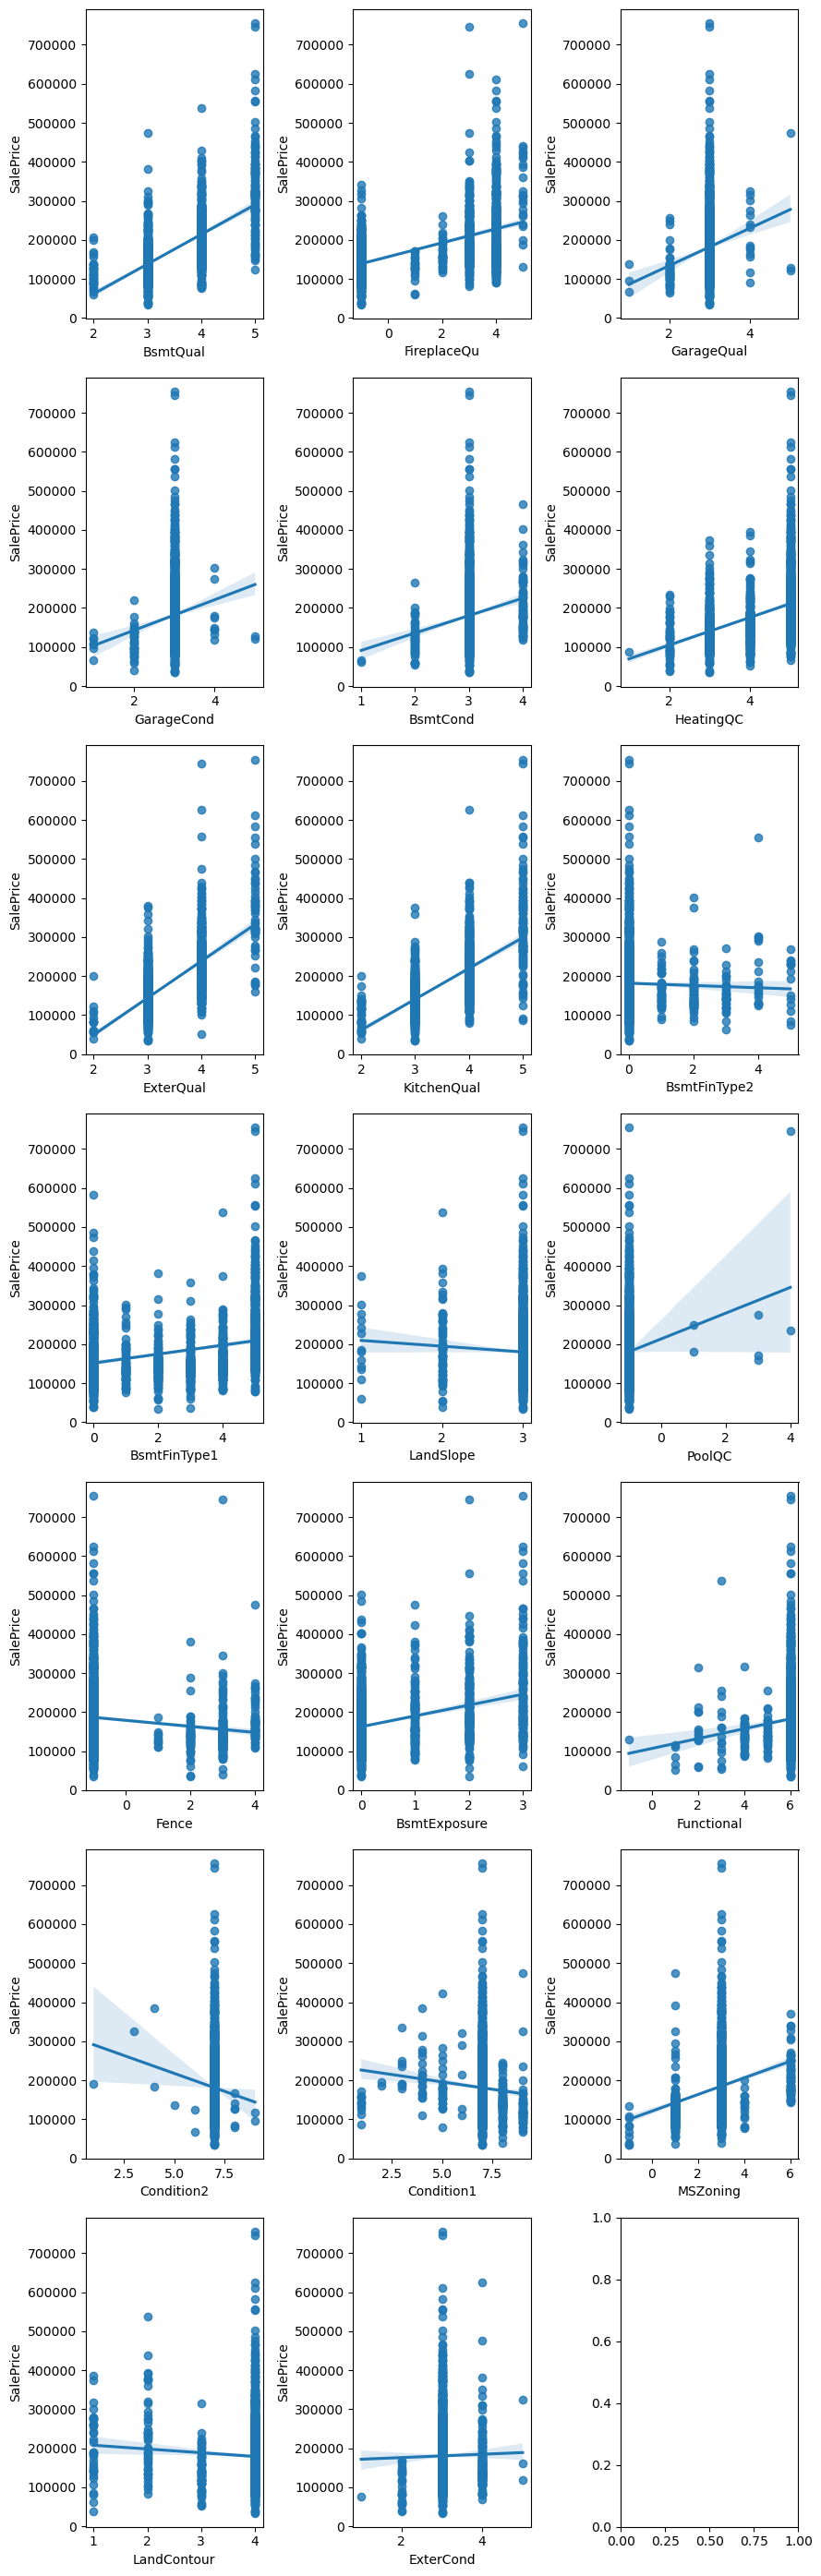

In [57]:
target = train['SalePrice']
num=len(category_order)
col = 3
row = num//col +1

# 충분한 서브플롯 생성
fig, axs = plt.subplots(row, col, figsize=(col*3, row*4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < len(category_order):
            sns.regplot(train[category_order[i]], target, ax=axs[r, c])

plt.tight_layout()
plt.show()

In [58]:
# 여기에 포함되지 않는 변수는 어차피 나중에 encode로 추가됨 -> 여기만 수정하면 됨
#분석 결과 최종 카테고리형 변수 중 순서형 변수
category_order2 = ['BsmtQual', 'ExterQual', 'KitchenQual']

### 2. 숫자형 중 순서형

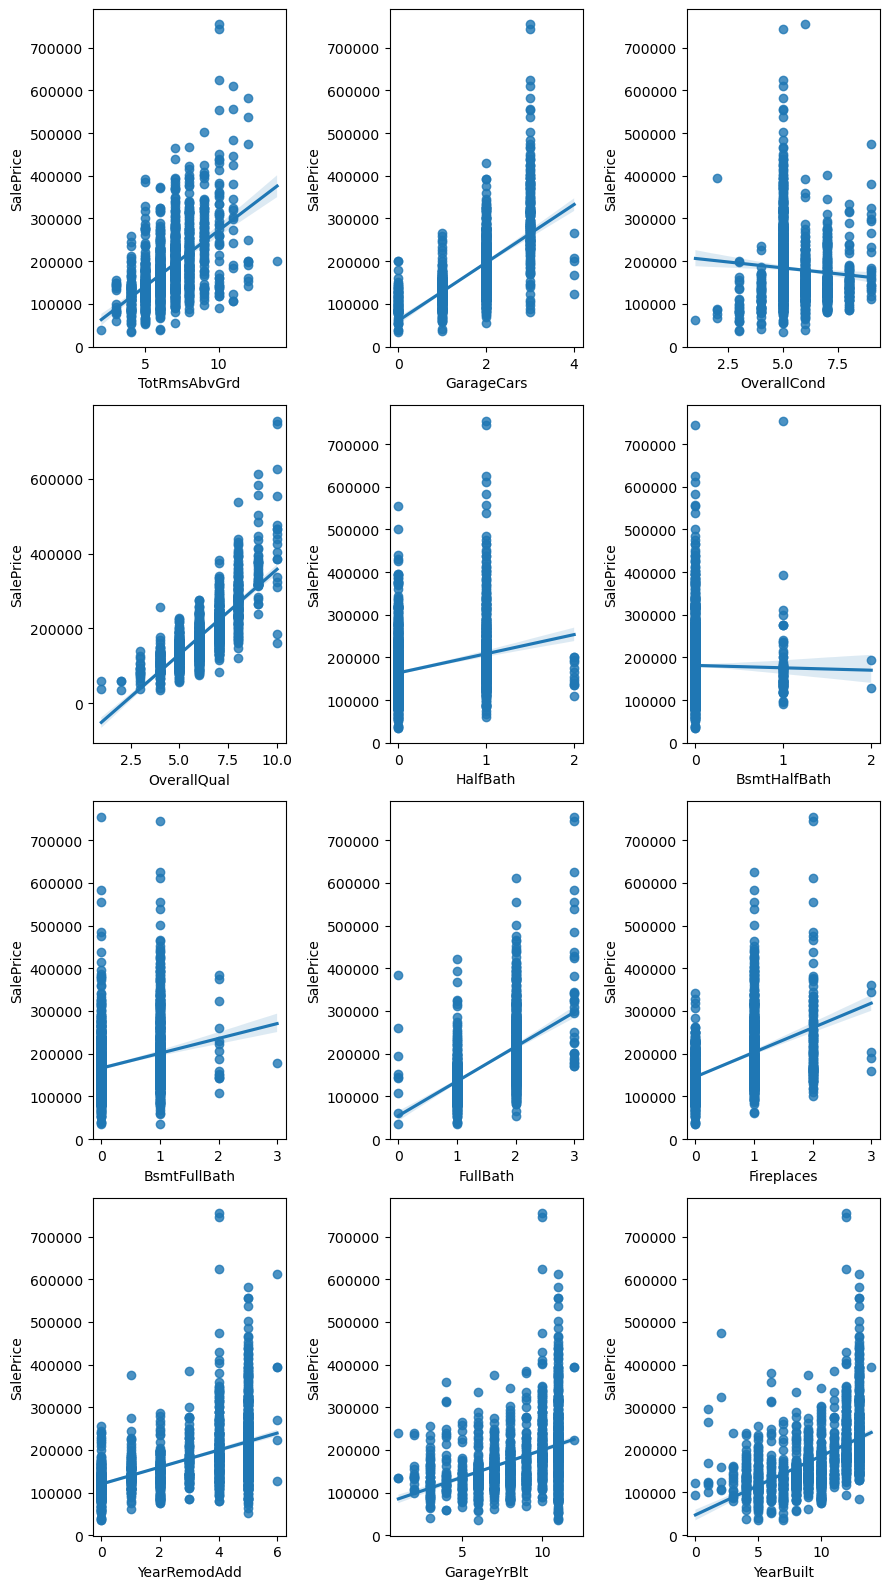

In [59]:
target = train['SalePrice']
num=len(numeric_order)
row = num//3
if(row<1):
    row=1
col = 3

# 충분한 서브플롯 생성
fig, axs = plt.subplots(row, col, figsize=(col*3, row*4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < len(numeric_order):
            sns.regplot(train[numeric_order[i]], target, ax=axs[r, c])

plt.tight_layout()
plt.show()


### 3. 리스트 정리 

In [60]:
# 여기에 포함되지 않는 변수는 어차피 나중에 encode로 추가됨 앞에 안건들여도됨
#최종 숫자형 변수 중 순서형 변수
numeric_order2 = [
        'TotRmsAbvGrd', 'GarageCars', 
         'OverallQual', 'FullBath', 'Fireplaces',
         'YearRemodAdd','GarageYrBlt','YearBuilt'
]

순서가 있을 것이라고 예상한 변수 중 

분석 결과 실제로는 없다고 판단되는 특성들은 순서형 리스트에서 제거하고,

전체 원핫인코딩리스트로 추가

In [61]:
for i in category_order2:
    category_order.remove(i)

for j in category_order:
    category_encode.append(j)

for i in numeric_order2:
    numeric_order.remove(i)
    
for j in numeric_order:
    numeric_encode.append(j)

category_order=category_order2
numeric_order=numeric_order2

In [62]:
print("최종 카테고리형 중 순서형:",category_order)
print("최종 숫자형 중 순서형:",numeric_order)

최종 카테고리형 중 순서형: ['BsmtQual', 'ExterQual', 'KitchenQual']
최종 숫자형 중 순서형: ['TotRmsAbvGrd', 'GarageCars', 'OverallQual', 'FullBath', 'Fireplaces', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']


In [63]:
# 최종 원핫인코딩할 변수들
total_encode = list(set(numeric_encode) | set(category_encode))

# (7) 카테고리형 중 순서형 값 매핑

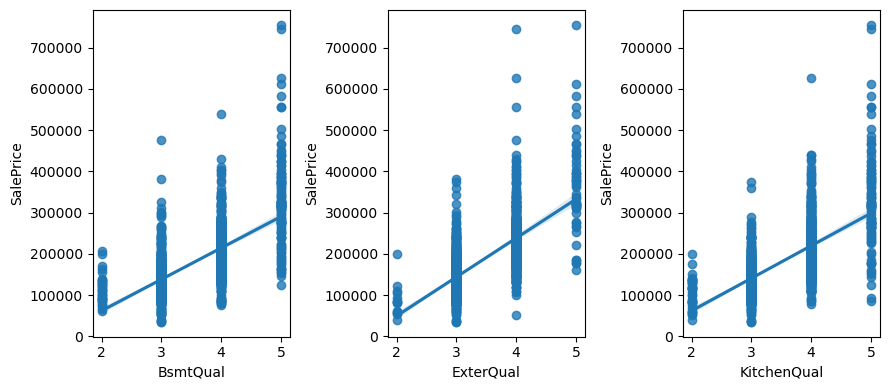

In [64]:
num=len(category_order)
row = int(num//3)
col = 3

# 충분한 서브플롯 생성
fig, axs = plt.subplots(row, col, figsize=(col * 3, row * 4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < len(category_order):
            sns.regplot(train[category_order[i]], target, ax=axs[c])
            axs[c].set_xlabel(category_order[i])  # x축 레이블 설정

plt.tight_layout()
plt.show()

우선 순서가 있음을 확인했으므로 간단하게 0부터 1씩 증가시키는 것으로 값 매핑

!!! 매핑이므로 이거는 data를 수정해야함

In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in category_order:
    data[i] = label_encoder.fit_transform(data[i])

숫자형은 값 매핑 x (연도는 위에서 최소 연도 기준 1씩 증가하도록 매핑함)

In [66]:
data[numeric_order].head()

,TotRmsAbvGrd,GarageCars,OverallQual,FullBath,Fireplaces,YearRemodAdd,GarageYrBlt,YearBuilt
Id,,,,,,,,
1,8,2.0,7,2,0,5,11,13
2,6,2.0,6,2,1,2,8,10
3,6,2.0,7,2,1,5,11,13
4,7,3.0,7,1,1,2,10,4
5,9,3.0,8,2,1,5,11,13


# (8) 최종 순서형 변수들 시각화

In [67]:
total_order=category_order+numeric_order

In [68]:
print(total_order)

['BsmtQual', 'ExterQual', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars', 'OverallQual', 'FullBath', 'Fireplaces', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']


c:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


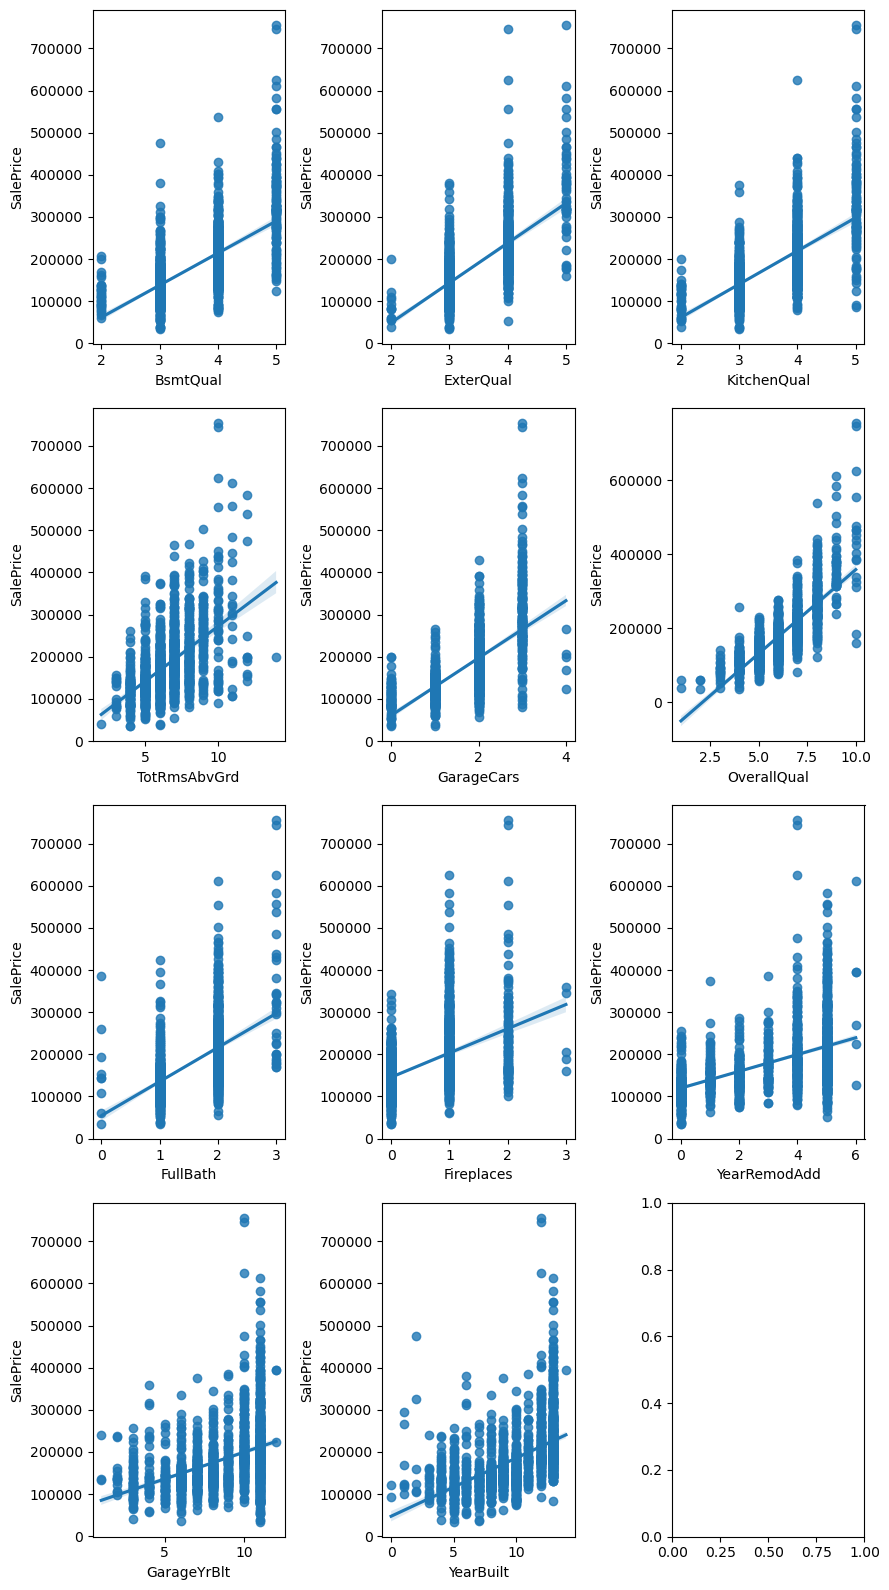

In [69]:
num=len(total_order)
col = 3 
row = num//col+1

fig, axs = plt.subplots(row, col, figsize=(col*3, row*4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < len(total_order):
            sns.regplot(train[total_order[i]], target, ax=axs[r, c])

plt.tight_layout()
plt.show()


추가로 연속형 변수들 확인

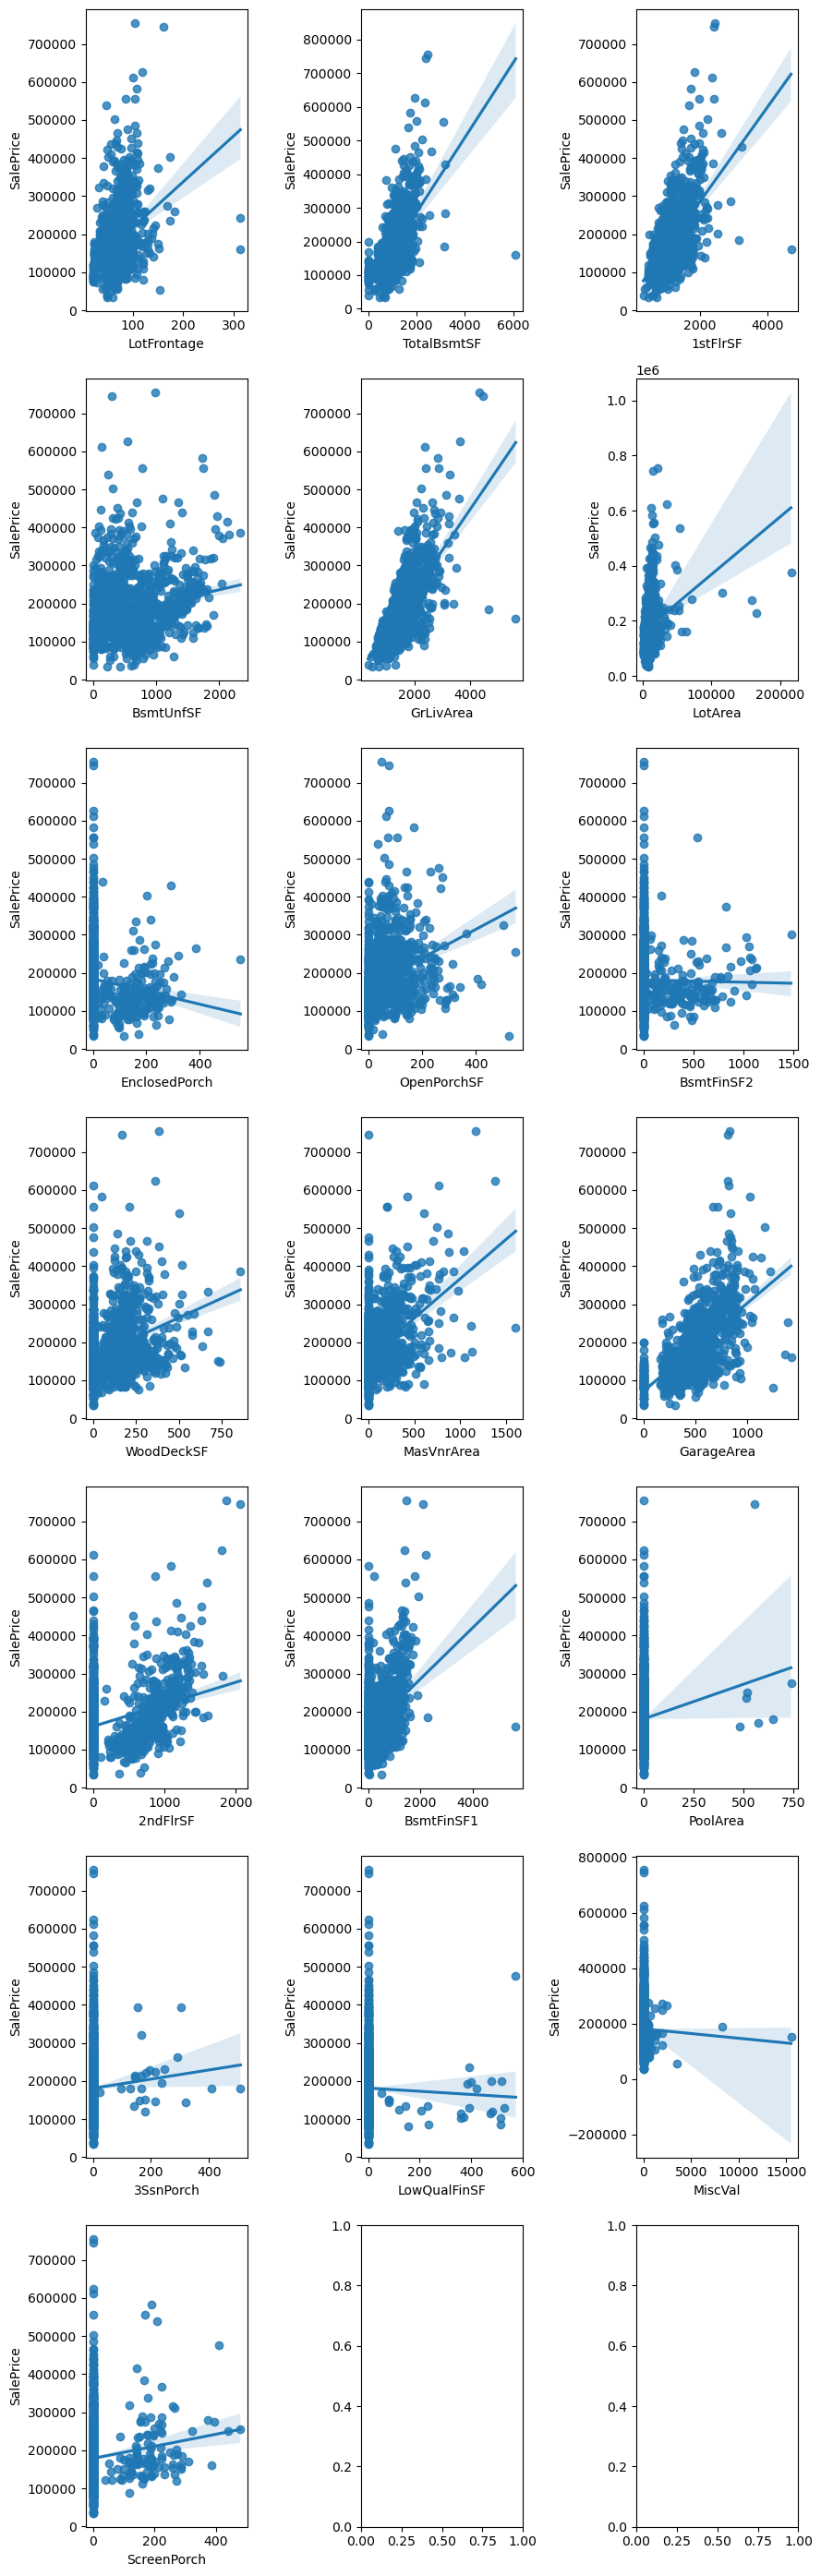

In [70]:
num=len(numeric_con)
col = 3 
row = num//col+1

fig, axs = plt.subplots(row, col, figsize=(col*3, row*4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < len(numeric_con):
            sns.regplot(train[numeric_con[i]], target, ax=axs[r, c])

plt.tight_layout()
plt.show()


'TotalBsmtSF','1stFlrSF','GrLivArea' 연속형중 선형성이 강한 컬럼들

# (9) 변수 유형별 리스트 정리
(pickle에 저장해서 모델링 파일에서 사용)

In [71]:
print(category_order)
print(numeric_order)
print(numeric_con)
print(total_encode)

['BsmtQual', 'ExterQual', 'KitchenQual']
['TotRmsAbvGrd', 'GarageCars', 'OverallQual', 'FullBath', 'Fireplaces', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']
['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']
['Exterior2nd', 'BsmtFullBath', 'Fence', 'BldgType', 'PavedDrive', 'Alley', 'BsmtCond', 'ExterCond', 'SaleCondition', 'LotShape', 'Neighborhood', 'PoolQC', 'Condition2', 'HeatingQC', 'Condition1', 'Street', 'CentralAir', 'GarageType', 'MSZoning', 'RoofMatl', 'MoSold', 'OverallCond', 'SaleType', 'LandSlope', 'MSSubClass', 'BsmtHalfBath', 'GarageCond', 'Utilities', 'Heating', 'YrSold', 'Exterior1st', 'GarageQual', 'Foundation', 'HouseStyle', 'BsmtFinType1', 'MiscFeature', 'Functional', 'BsmtFinType2', 'GarageFinish', 'Electrical', 'BsmtExposure', 'RoofStyle', 'LotConfig', 'Land

In [72]:
print("전체 특성 개수:",len(data.columns))
print("분류 이후 전체 개수:",len(category_order)+len(numeric_order)+len(total_encode)+len(numeric_con))
# 타겟변수는 제외했으므로 일치하는 것임

전체 특성 개수: 78
분류 이후 전체 개수: 77


In [73]:
total_list=['category_order',category_order,'numeric_order',numeric_order,'numeric_con',numeric_con,'total_encode',total_encode]

In [74]:
import pickle
with open('total_list.pkl', 'wb') as f:
    pickle.dump(total_list, f)